In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
census_file = "Original_Data_Sets/Census_2020_income.csv"
census_file_df = pd.read_csv(census_file, encoding="UTF-8")
census_file_df = census_file_df.dropna()
census_file_df.head()

,Label (Grouping),Washington!!Households!!Estimate,Washington!!Households!!Margin of Error,Washington!!Families!!Estimate,Washington!!Families!!Margin of Error,Washington!!Married-couple families!!Estimate,Washington!!Married-couple families!!Margin of Error,Washington!!Nonfamily households!!Estimate,Washington!!Nonfamily households!!Margin of Error,"Adams County, Washington!!Households!!Estimate",...,"Whitman County, Washington!!Nonfamily households!!Estimate","Whitman County, Washington!!Nonfamily households!!Margin of Error","Yakima County, Washington!!Households!!Estimate","Yakima County, Washington!!Households!!Margin of Error","Yakima County, Washington!!Families!!Estimate","Yakima County, Washington!!Families!!Margin of Error","Yakima County, Washington!!Married-couple families!!Estimate","Yakima County, Washington!!Married-couple families!!Margin of Error","Yakima County, Washington!!Nonfamily households!!Estimate","Yakima County, Washington!!Nonfamily households!!Margin of Error"
0,Total,"2,905,822","±5,585","1,874,376","±7,594","1,456,242","±8,632","1,031,446","±5,591","6,035",...,"9,852",±550,"83,765",±529,"60,339","±1,076","42,000","±1,174","23,426","±1,081"
1,"Less than $10,000",4.40%,±0.1,2.60%,±0.1,1.00%,±0.1,8.80%,±0.2,7.80%,...,24.10%,±3.2,5.40%,±0.7,3.80%,±0.6,1.30%,±0.5,11.60%,±1.8
2,"$10,000 to $14,999",3.10%,±0.1,1.60%,±0.1,0.80%,±0.1,6.20%,±0.2,4.20%,...,8.50%,±1.9,4.10%,±0.5,2.80%,±0.6,1.40%,±0.5,8.60%,±1.4
3,"$15,000 to $24,999",6.50%,±0.1,4.10%,±0.1,2.30%,±0.1,11.60%,±0.3,11.00%,...,19.50%,±3.6,9.80%,±0.9,8.50%,±1.1,4.90%,±0.9,16.10%,±2.1
4,"$25,000 to $34,999",6.90%,±0.1,5.10%,±0.1,3.60%,±0.1,10.60%,±0.2,8.90%,...,13.00%,±2.5,9.90%,±0.9,9.10%,±1.0,6.30%,±1.0,13.80%,±2.0


In [3]:
SE_index_list = [0]
n = 2

for x in range(39):
    n = n + 8
    SE_index_list.append(n)


In [4]:
census_file_se_df = census_file_df.iloc[[11,12], SE_index_list].copy()
census_file_se_df = census_file_se_df.set_index(census_file_se_df["Label (Grouping)"])
census_file_se_df.drop(columns=["Label (Grouping)"], inplace=True)
census_file_se_df = census_file_se_df.rename_axis(None)

census_file_se_df.head()

,"Adams County, Washington!!Households!!Margin of Error","Asotin County, Washington!!Households!!Margin of Error","Benton County, Washington!!Households!!Margin of Error","Chelan County, Washington!!Households!!Margin of Error","Clallam County, Washington!!Households!!Margin of Error","Clark County, Washington!!Households!!Margin of Error","Columbia County, Washington!!Households!!Margin of Error","Cowlitz County, Washington!!Households!!Margin of Error","Douglas County, Washington!!Households!!Margin of Error","Ferry County, Washington!!Households!!Margin of Error",...,"Skamania County, Washington!!Households!!Margin of Error","Snohomish County, Washington!!Households!!Margin of Error","Spokane County, Washington!!Households!!Margin of Error","Stevens County, Washington!!Households!!Margin of Error","Thurston County, Washington!!Households!!Margin of Error","Wahkiakum County, Washington!!Households!!Margin of Error","Walla Walla County, Washington!!Households!!Margin of Error","Whatcom County, Washington!!Households!!Margin of Error","Whitman County, Washington!!Households!!Margin of Error","Yakima County, Washington!!Households!!Margin of Error"
Median income (dollars),"±4,234","±3,199","±2,491","±3,003","±2,777","±1,513","±8,611","±2,882","±2,619","±5,039",...,"±5,634","±1,267",±813,"±2,780","±1,706","±4,690","±3,240","±2,177","±2,674","±1,110"
Mean income (dollars),"±5,006","±5,983","±2,020","±3,649","±2,246","±1,428","±16,267","±2,494","±8,295","±6,301",...,"±5,678","±1,370","±1,230","±2,698","±1,673","±7,276","±3,463","±1,657","±2,875","±1,869"


In [5]:
census_se_df = census_file_se_df.transpose()
census_se_df = census_se_df.reset_index()
census_se_df["index"] = census_se_df["index"].str.strip(", Washington!!Households!!Estimate")
county_split = census_se_df["index"].str.split(" ", n=1, expand=True)
census_se_df["index"] = county_split[0]
census_se_df = census_se_df.rename(columns={"index":"County"})
census_se_df = census_se_df.set_index(census_se_df["County"])
census_se_df.drop(columns=["County"], inplace=True)

census_se_df.head(10)

,Median income (dollars),Mean income (dollars)
County,,
Adams,"±4,234","±5,006"
Asotin,"±3,199","±5,983"
Benton,"±2,491","±2,020"
Chelan,"±3,003","±3,649"
Clallam,"±2,777","±2,246"
Clark,"±1,513","±1,428"
Columbia,"±8,611","±16,267"
Cowlitz,"±2,882","±2,494"
Douglas,"±2,619","±8,295"


In [6]:
census_se_df["Median income (dollars)"] = census_se_df["Median income (dollars)"].str.replace("±","")
census_se_df["Median income (dollars)"] = census_se_df["Median income (dollars)"].str.replace(",","")
census_se_df["Mean income (dollars)"] = census_se_df["Mean income (dollars)"].str.replace("±","")
census_se_df["Mean income (dollars)"] = census_se_df["Mean income (dollars)"].str.replace(",","")

census_se_df["Median income (dollars)"] = census_se_df["Median income (dollars)"].astype("int64")
census_se_df["Mean income (dollars)"] = census_se_df["Mean income (dollars)"].astype("int64")

census_se_df.dtypes

Median income (dollars)    int64
Mean income (dollars)      int64
dtype: object

In [7]:
median_me_mean = census_se_df["Median income (dollars)"].mean(numeric_only=True)
median_me_median = census_se_df["Median income (dollars)"].median(numeric_only=True)
mean_me_mean = census_se_df["Mean income (dollars)"].mean(numeric_only=True)
mean_me_median = census_se_df["Mean income (dollars)"].median(numeric_only=True)

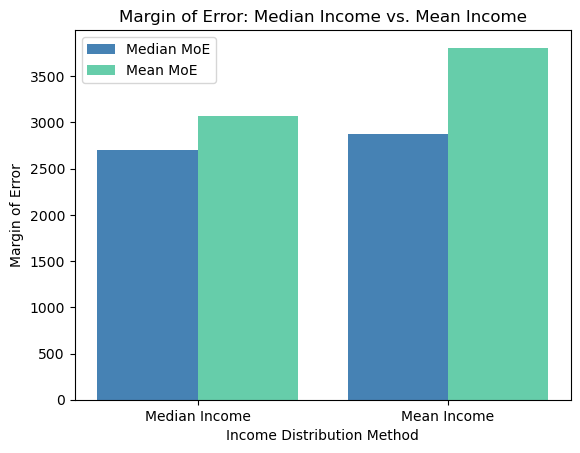

In [9]:
median = [median_me_median, mean_me_median]
mean = [median_me_mean, mean_me_mean]

x_axis_ticks = ["Median Income", "Mean Income"]

x_axis = np.arange(len(x_axis_ticks))

plt.bar(x_axis - 0.2, median, 0.4, label = "Median MoE", color="steelblue")
plt.bar(x_axis + 0.2, mean, 0.4, label = "Mean MoE", color="mediumaquamarine")

plt.title("Margin of Error: Median Income vs. Mean Income")
plt.xticks(x_axis, x_axis_ticks)
plt.xlabel("Income Distribution Method")
plt.ylabel("Margin of Error")
plt.legend()

plt.show()